In [1]:
import cv2
import numpy as np
import os
import mediapipe as mp
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
DATA_PATH = os.path.join('MP_Data') 

actions = np.array(['Indian', 'Sign', 'Language', 'Man', 'Woman', 'Namaste', 'Deaf', 'Sorry', 'Happy', 'Sad', 'Understand', 'Bye', 'Please', 'Food', 'Water'])

no_sequences = 30

sequence_length = 30

start_folder = 30

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [5]:
X = np.array(sequences)

In [6]:
y = to_categorical(labels).astype(int)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1000)

In [8]:
y_test.shape

(45, 15)

In [9]:
X_train.shape

(405, 30, 258)

In [10]:
model = load_model('actions_95%_0.1_1000.h5')

In [11]:
yhat = model.predict(X_test)

2/2 [==============================] - 4s 81ms/step


In [12]:
actions[np.argmax(yhat[4])]

'Water'

In [13]:
actions[np.argmax(y_test[4])]

'Water'

In [14]:
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

In [15]:
accuracy_score(ytrue, yhat)

0.9555555555555556

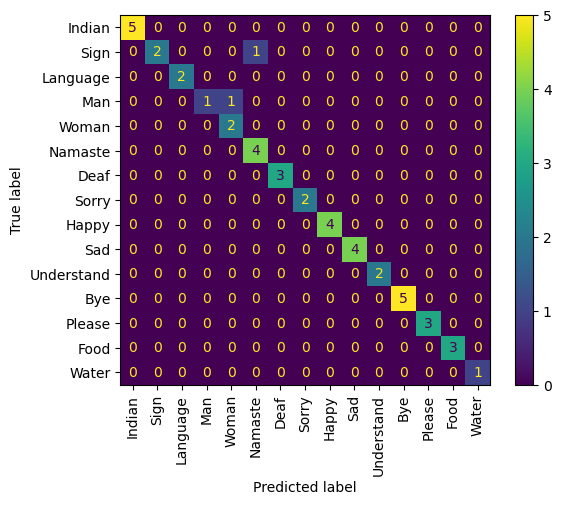

In [16]:
cf_matrix = confusion_matrix(ytrue, yhat,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
cm = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=actions)
cm.plot(xticks_rotation='vertical')

In [17]:
cr = classification_report(ytrue, yhat)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       0.67      1.00      0.80         2
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.94        45
weighted avg       0.97   

In [18]:
# model.save('action4.h5')